# Image Morphology in Python 

scikit-image contain a variety of [morphological operations](https://scikit-image.org/docs/stable/api/skimage.morphology.html). In this exercise we will explore the use of some of these operations on binary image.

Start by importing some function:

```python
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
```

and define a convenience function to show two images side by side:

```python
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()
```


## Image morphology on a single object

An image, **lego_5.png** of a lego brick can be used to test some of the basic functions. 

### Exercise 1

We will start by computing a binary image from the lego image:

- Read the image into **im_org**.
- Convert the image to gray scale. 
- Find a threshold using *Otsu's method*.
- Apply the treshold and generate a binary image **bin_img**.
- Visualize the image using `plot_comparison(im_org, bin_img, 'Binary image')`

As ncan be seen, the lego brick is not *segmented* perfectly. There are holes in the segmentation. Let us see if what we can do.


In [4]:
from scipy.ndimage import correlate
import math
import numpy as np
from scipy import optimize
from IPython.display import Image
import skimage
from skimage import io
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage.morphology import dilation
from skimage.morphology import closing
from skimage.morphology import opening
import matplotlib.pyplot as plt

In [5]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

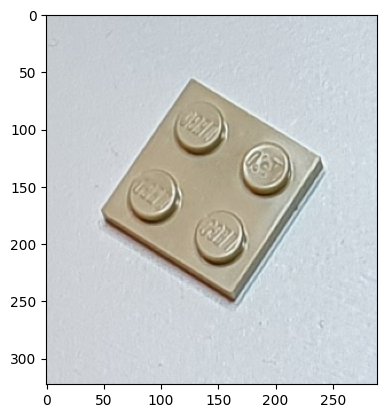

In [6]:
lego = io.imread('data/lego_5.png')

plt.imshow(lego)
plt.show()

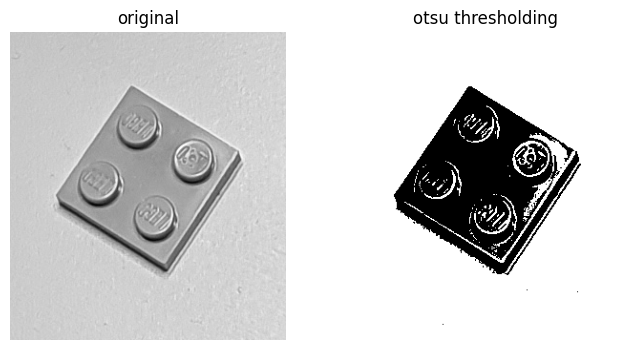

In [7]:
from skimage.filters import threshold_otsu

lego = io.imread('data/lego_5.png', as_gray=True)

# Apply Otsu thresholding
thresh = threshold_otsu(lego)
binary = lego > thresh

plot_comparison(lego, binary, 'otsu thresholding')

### Exercise 2

We will start by creating a *structuring element*. In scikit-image they are called *footprint*. A disk shaped footprint can be created by:

```python
footprint = disk(2)
# Check the size and shape of the structuring element
print(footprint)
```

The morphological operation **erosion** can remove small objects, separate objects and make objects smaller. Try it on the binary lego image:

```python
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')
```

Experiement with different sizes of the footprint and observe the results.

In [8]:
footprint = disk(2)
print(footprint)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


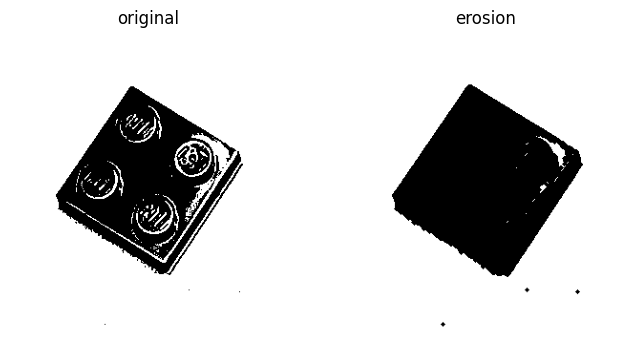

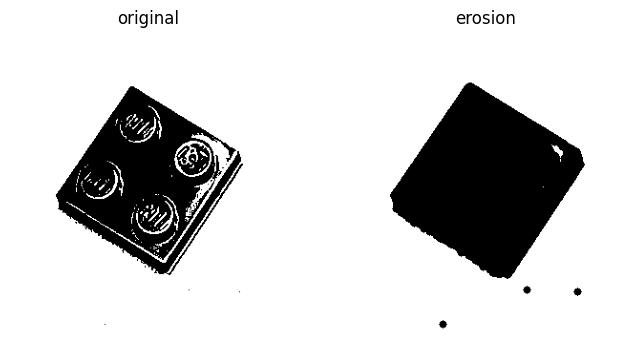

In [9]:
eroded = erosion(binary, footprint)

plot_comparison(binary, eroded, 'erosion')

footprint = disk(4)
plot_comparison(binary, erosion(binary, footprint), 'erosion')


### Exercise 3

The morphological operation **dilation** makes objects larger, closes holes and connects objects. Try it on the binary lego image:

```python
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')
```

Experiement with different sizes of the footprint and observe the results.


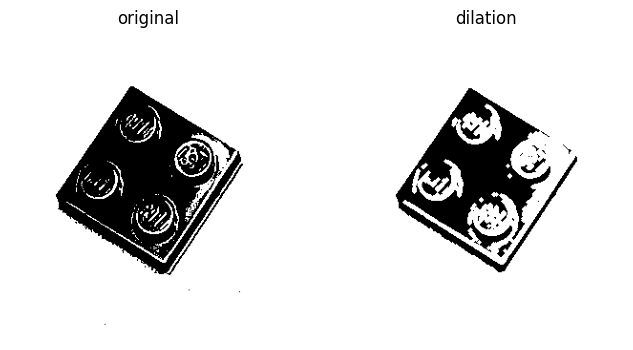

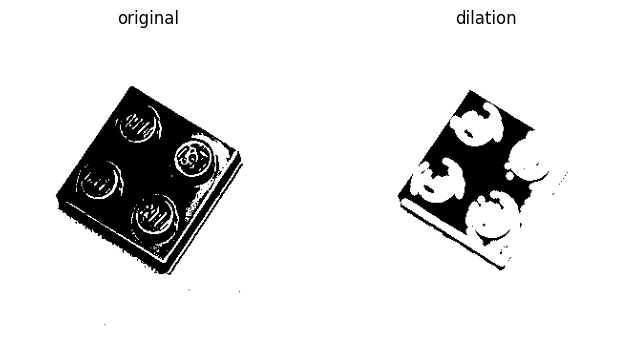

In [10]:
footprint = disk(2)
dilated = dilation(binary, footprint)
plot_comparison(binary, dilated, 'dilation')


footprint = disk(4)
dilated = dilation(binary, footprint)
plot_comparison(binary, dilated, 'dilation')

### Exercise 4

The morphological operation **opening** removes small objects without changing the size of the remaining objects. Try it on the binary lego image:

```python
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')
```

Experiement with different sizes of the footprint and observe the results.


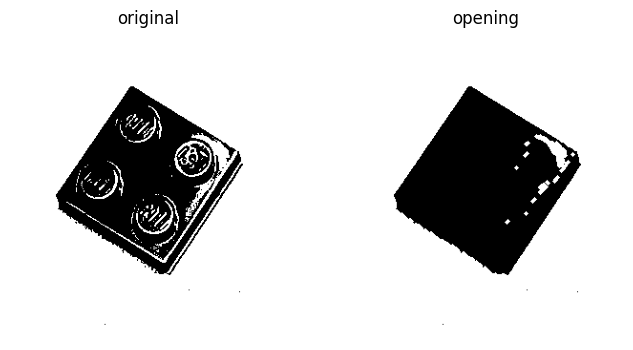

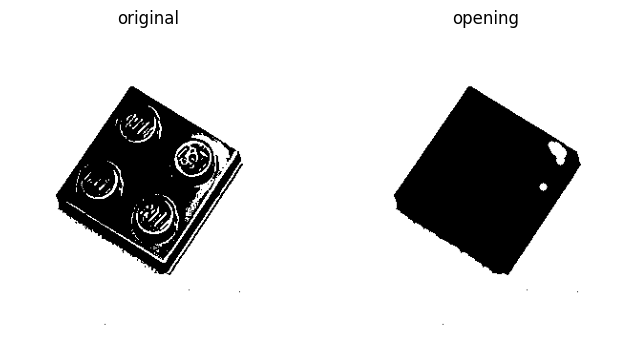

In [11]:
footprint = disk(2)
opened = opening(binary, footprint)
plot_comparison(binary, opened, 'opening')


footprint = disk(4)
opened = opening(binary, footprint)
plot_comparison(binary, opened, 'opening')

### Exercise 5

The morphological operation **closing** closes holes in objects without changing the size of the remaining objects. Try it on the binary lego image:

```python
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')
```

Experiement with different sizes of the footprint and observe the results.

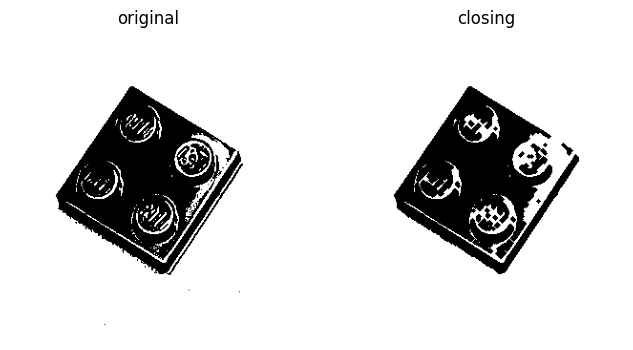

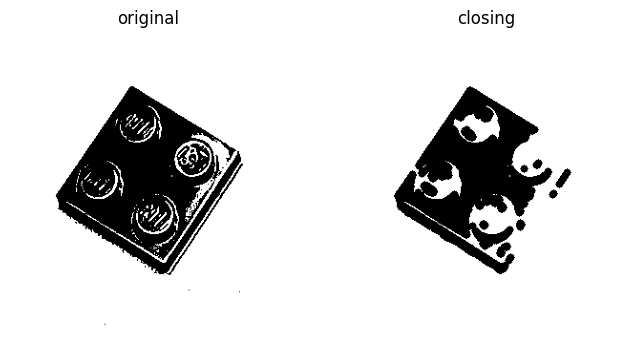

In [12]:
footprint = disk(2)
closed = closing(binary, footprint)
plot_comparison(binary, closed, 'closing')


footprint = disk(4)
closed = closing(binary, footprint)
plot_comparison(binary, closed, 'closing')

## Object outline

It can be useful to compute the outline of an object both to measure the perimeter but also to see if it contains holes or other types of noise. Start by defining an outline function:

```python
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline
```

### Exercise 6

Compute the outline of the binary image of the lego brick. What do you observe?

In [13]:
def computer_outline(img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(img, footprint)
    outline = np.logical_xor(dilated, img)
    return outline

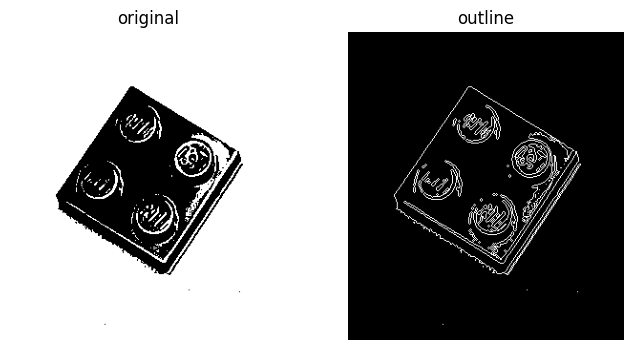

In [14]:
outlined = computer_outline(binary)

plot_comparison(binary, outlined, 'outline')

### Exercise 7

Try the following:

- Do an *opening* with a disk of size 1 on the binary lego image.
- Do a *closing* with a disk of size 15 on the result of the opening.
- Compute the outline and visualize it.

What do you observe and why does the result look like that?

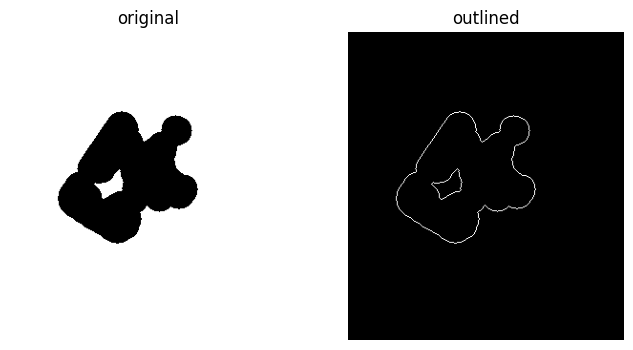

In [15]:
footprint = disk(1)
opened1 = opening(binary, footprint)

footprint = disk(15)
closed15 =  closing(opened1, footprint)

outlined15 = computer_outline(closed15)

plot_comparison (closed15, outlined15, "outlined")

## Morphology on multiple objects

Let us try to do some analysis on images with multiple objects.

### Exercise 8

Start by:
- reading the **lego_7.png** image and convert it to gray scale.
- Compute a treshold using *Otsu's method* and apply it to the image.
- Show the binary image together with the original.
- Compute the outline of the binary image and show it with the binary image.

What do you observe?

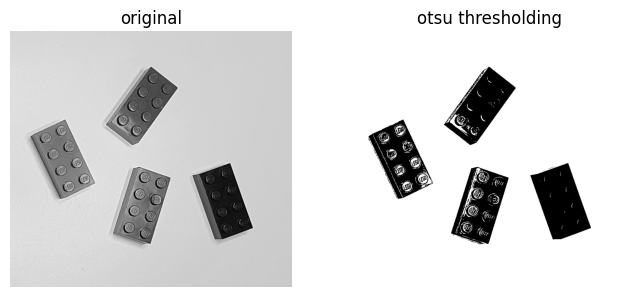

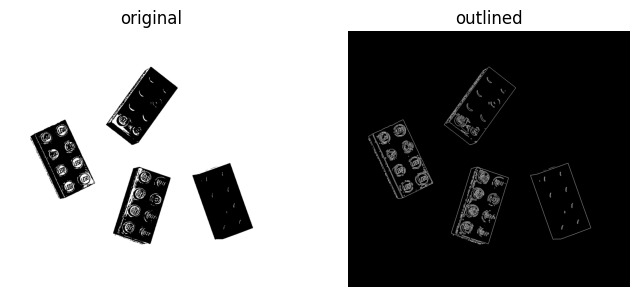

In [16]:
lego7 = io.imread('data/lego_7.png', as_gray=True)

# Apply Otsu thresholding
thresh = threshold_otsu(lego7)
binary = lego7 > thresh

plot_comparison(lego7, binary, 'otsu thresholding')

plot_comparison(binary, computer_outline(binary), 'outlined')

### Exercise 9

We would like to find a way so only the outline of the entire brick is computed. So for each lego brick there should only be one closed curve.

Try using the *closing* operations and find out which size of footprint that gives the desired result?

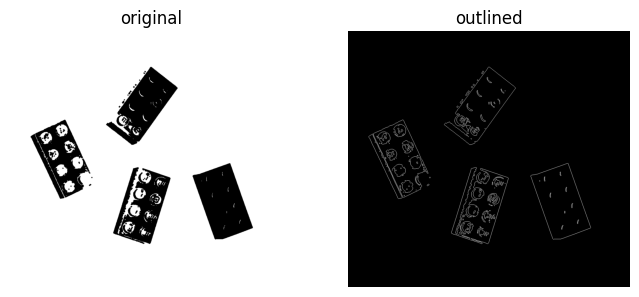

In [17]:
footprint = disk(2)

closed = closing(binary, footprint)
plot_comparison(closed, computer_outline(closed), 'outlined')


### Exercise 10

Try the above on the **lego_3.png** image. What do you observe?

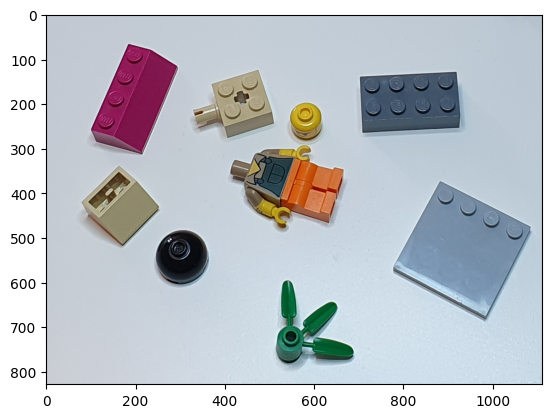

In [18]:
lego3 = io.imread('data/lego_3.png')

plt.imshow(lego3)
plt.show()

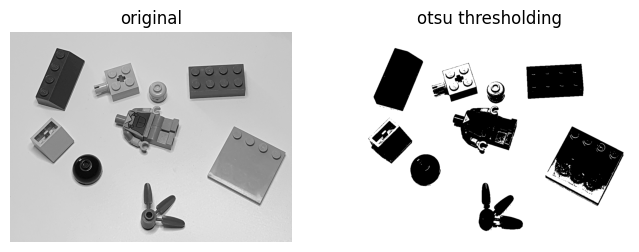

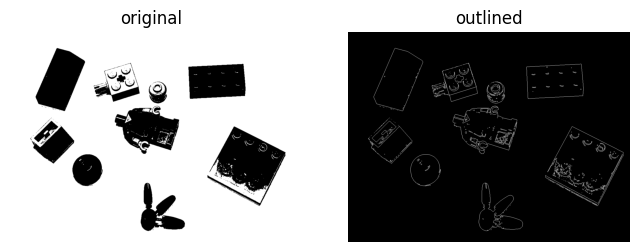

In [20]:
lego3 = io.imread('data/lego_3.png', as_gray=True)

# Apply Otsu thresholding
thresh = threshold_otsu(lego3)
binary = lego3 > thresh

plot_comparison(lego3, binary, 'otsu thresholding')

plot_comparison(binary, computer_outline(binary), 'outlined')

## Morphology on multiple connected objects

Morphology is a strong tool that can be used to clean images and separate connected objects. In image **lego_9.png** some lego bricks are touching. We would like to see if we can separate them.

### Exercise 11

Start by:
- reading the **lego_9.png** image and convert it to gray scale.
- Compute a treshold using *Otsu's method* and apply it to the image.
- Show the binary image together with the original.
- Compute the outline of the binary image and show it with the binary image.

What do you observe?

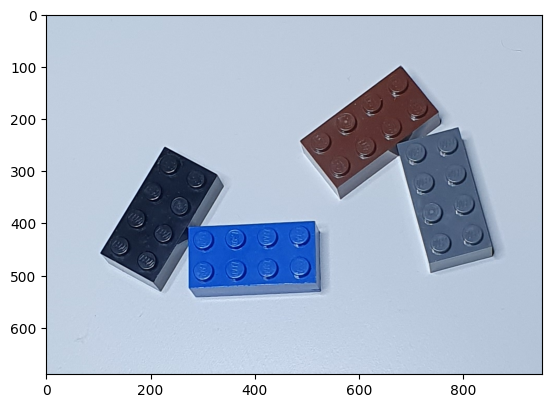

In [21]:
lego9 = io.imread('data/lego_9.png')

plt.imshow(lego9)
plt.show()

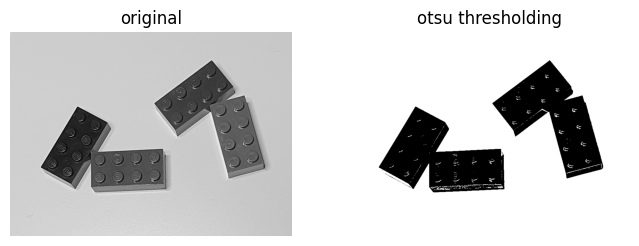

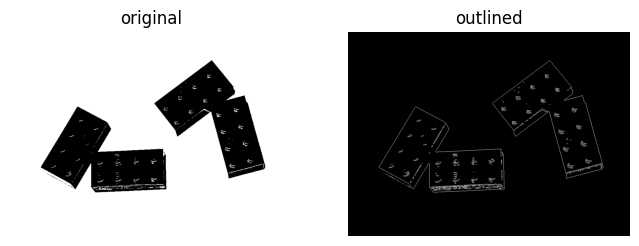

In [22]:
lego9 = io.imread('data/lego_9.png', as_gray=True)

# Apply Otsu thresholding
thresh = threshold_otsu(lego9)
binary = lego9> thresh

plot_comparison(lego9, binary, 'otsu thresholding')

plot_comparison(binary, computer_outline(binary), 'outlined')

### Exercise 12

Let us start by trying to remove the noise holes inside the lego bricks. Do that with an *closing* and find a good footprint size. Compute the outline and see what you observe?


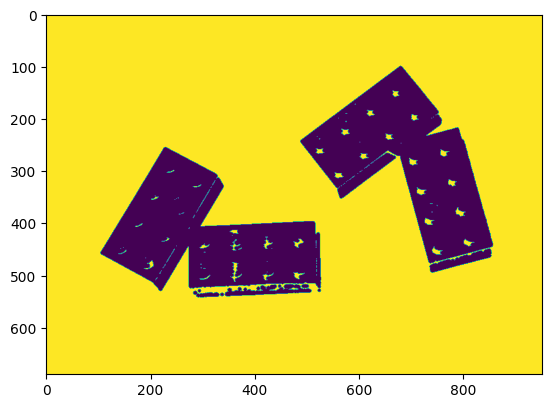

In [61]:
footprint = disk(3)

closed = closing(binary, footprint)
plt.imshow(closed)

### Exercise 13

Now we will try to separate the objects. Try using a *erosion* on the image that you repaired in exercise 12. You should probably use a rather large footprint. How large does it need to be in order to split the objects?



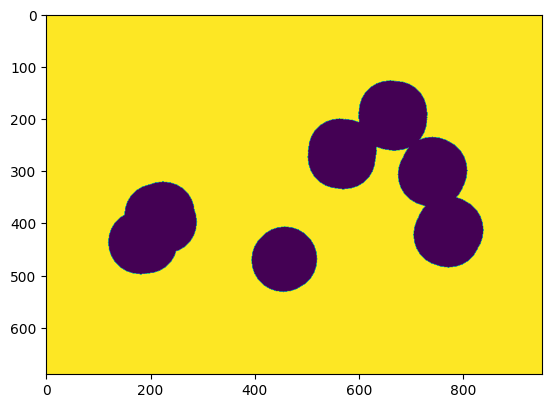

In [65]:
footprint = disk(30)

closed = closing(binary, footprint)
eroded = erosion(closed, footprint)
plt.imshow(eroded)

### Exercise 14

The objects lost a lot of size in the previous step. Try to use *dilate* to make them larger. How large can you make them before they start touching?

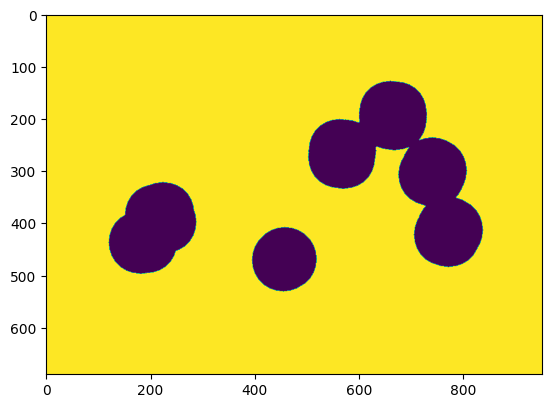

In [71]:
dilated = dilation(eroded, disk(1))

plt.imshow(dilated)

## Puzzle piece analysis

We would like to make a program that can help solving puzzles. The first task is to outline each piece. A photo, **puzzle_pieces.png** is provided. 

### Exercise 15

Use the previosly used methods to compute a binary image from the puzzle photo. What do you observe?

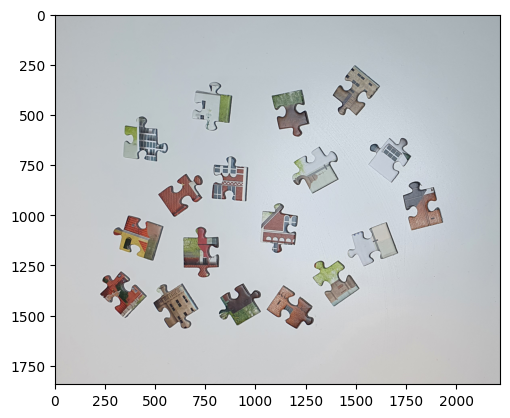

In [73]:
puzzle = io.imread('data/puzzle_pieces.png')

plt.imshow(puzzle)

### Exercise 16

Try to use a an *opening* with a large footprint to clean the binary. Compute the outline. Do we have good outlines for all the pieces?


The conclusion is that you can solve a lot of problems using morphological operations but sometimes it is better to think even more about how to acquire the images.

In [111]:
def computer_outline(img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(img, footprint)
    outline = np.logical_xor(dilated, img)
    return outline

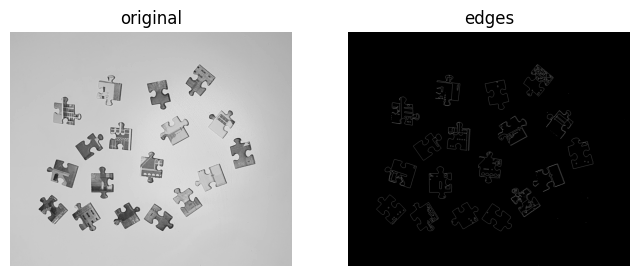

In [116]:
puzzle = io.imread('data/puzzle_pieces.png', as_gray=True)

# Apply opening
footprint = disk(3)
opened = opening(puzzle, footprint)

# Apply otus thresholding
thresh = threshold_otsu(opened)
binary = opened > thresh

plot_comparison(puzzle, computer_outline(binary), 'edges')